# Imports

In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import gc

DATA_DIR = 'data/'

# Utilitary functions

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def clear_memory(df):
    lst = [df]
    del df
    del lst
    gc.collect()

# Number of reviews per category

In [32]:
def to_datetime(df):
    df['datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
    return df
    
def get_count_year(df):
    return df['datetime'].groupby([df.datetime.dt.year]).agg('average')

def get_count_month_year(df):
    return df['datetime'].groupby([df.datetime.dt.year, df.datetime.dt.month]).agg('avg')

## Category: Pet Supplies

In [31]:
pet_supplies = getDF(DATA_DIR + 'reviews_Pet_Supplies.json.gz')
pet_supplies = to_datetime(pet_supplies)
pet_supplies.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,A3PG0KS1YE8MR4,0615553605,Big Sky Gal,"[3, 3]",Recipes are easy and the dogs love them. I wou...,5.0,Great little book!,1354838400,"12 7, 2012",2012-12-07
1,A363P047LR5XI6,0615553605,Miguel Giraldo,"[2, 2]","I received the book in the mail yesterday, the...",4.0,Nice little book,1373932800,"07 16, 2013",2013-07-16
2,ABZ8CQXD42H4,0615553605,Ross Lockhart,"[0, 0]",Not so good. Some of the recipes are not what...,1.0,Did not like the book,1386028800,"12 3, 2013",2013-12-03
3,A3J8QW1MV1OP01,0615583474,Beth Light,"[4, 4]","This is a fun, interactive book that incorpora...",5.0,This is a Precious Book for Precious Cats,1347321600,"09 11, 2012",2012-09-11
4,A3ISA8Z0NB0ILH,0615583474,"George D. Marshall ""george1767""","[3, 3]",,5.0,Video review of Howie and Friends,1358899200,"01 23, 2013",2013-01-23


In [33]:
pet_supplies_year = get_count_year(pet_supplies)
pet_supplies_month_year = get_count_month_year(pet_supplies)
clear_memory(pet_supplies)

AttributeError: 'SeriesGroupBy' object has no attribute 'average'

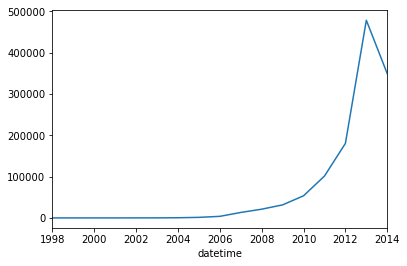

In [27]:
pet_supplies_year.plot()
plt.show()

## Category: Office Products

In [19]:
office = getDF(DATA_DIR + 'reviews_Office_Products.json.gz')
office = to_datetime(office)
office.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,"07 19, 2013",2013-07-19
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,"01 29, 2013",2013-01-29
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,"10 16, 2011",2011-10-16
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,"12 31, 2012",2012-12-31
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,"09 21, 2013",2013-09-21


In [20]:
office_year = get_count_year(office)
office_month_year = get_count_month_year(office)
clear_memory(office)

In [22]:
office_year

datetime
1998         1
1999       213
2000      1575
2001      2441
2002      3203
2003      4018
2004      4979
2005      8753
2006     11225
2007     24953
2008     29355
2009     44489
2010     70549
2011    111838
2012    179329
2013    433239
2014    313026
Name: datetime, dtype: int64

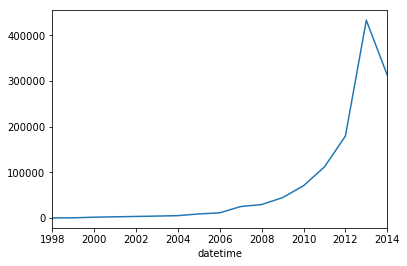

In [21]:
office_year.plot()
plt.show()

## Category: Grocery and Gourmet Food

In [14]:
food = getDF(DATA_DIR + 'reviews_Grocery_and_Gourmet_Food.json.gz')
food = to_datetime(food)
food.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,datetime
0,A1ZQZ8RJS1XVTX,0657745316,gsxrgirl,"[0, 0]","No sugar, no GMO garbage, no fillers that come...",5.0,Best vanilla I've ever had,1381449600,"10 11, 2013",2013-10-11
1,A31W38VGZAUUM4,0700026444,FIFA Lvr,"[1, 1]","This is my absolute, undisputed favorite tea r...",5.0,Terrific Tea!,1354752000,"12 6, 2012",2012-12-06
2,A3I0AV0UJX5OH0,1403796890,Alicia b,"[0, 0]",I ordered spongbob slippers and I got John Cen...,1.0,grrrrrrr,1385942400,"12 2, 2013",2013-12-02
3,A3QAAOLIXKV383,1403796890,"Danny K. Tilley ""Dan Tilley""","[0, 0]",The cart is fine and works for the purpose for...,3.0,Storage on Wheels Cart,1307836800,"06 12, 2011",2011-06-12
4,AB1A5EGHHVA9M,141278509X,CHelmic,"[1, 1]",This product by Archer Farms is the best drink...,5.0,The best drink mix,1332547200,"03 24, 2012",2012-03-24


In [15]:
food_year = get_count_year(food)
food_month_year = get_count_month_year(food)
clear_memory(food)

In [16]:
food_year

datetime
2000         3
2001         1
2002         8
2003       158
2004       608
2005      1462
2006      7424
2007     22479
2008     31591
2009     48523
2010     67055
2011    119804
2012    192903
2013    466834
2014    338303
Name: datetime, dtype: int64

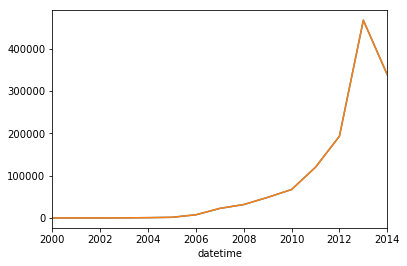

In [18]:
food_year.plot()
plt.show()